In [215]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 
%matplotlib inline

In [216]:
df=pd.read_csv(r"C:\Users\Sigma\Downloads\segmentation data.csv") # customer segmentations

In [217]:
df.head()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1


In [218]:
df.tail()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [219]:
df.sample(8)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1511,100001512,1,0,26,1,100402,0,0
1060,100001061,0,1,25,3,214364,2,2
160,100000161,0,0,36,1,129789,1,1
935,100000936,0,0,30,0,154854,2,1
853,100000854,0,0,32,0,69370,0,0
681,100000682,0,0,37,1,111394,1,1
1612,100001613,1,1,24,1,116473,0,0
1321,100001322,1,0,48,2,118749,0,0


In [220]:
df.shape

(2000, 8)

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [222]:
df.columns

Index(['ID', 'Sex', 'Marital status', 'Age', 'Education', 'Income',
       'Occupation', 'Settlement size'],
      dtype='object')

In [223]:
numerical=["ID","Age","Income"]


In [224]:
df[numerical].describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2000.0,1.000010e+08,577.494589,100000001.0,1.000005e+08,100001000.5,1.000015e+08,100002000.0
Age,2000.0,3.590900e+01,11.719402,18.0,2.700000e+01,33.0,4.200000e+01,76.0
Income,2000.0,1.209544e+05,38108.824679,35832.0,9.766325e+04,115548.5,1.380722e+05,309364.0


In [225]:
df.dtypes

ID                 int64
Sex                int64
Marital status     int64
Age                int64
Education          int64
Income             int64
Occupation         int64
Settlement size    int64
dtype: object

In [226]:
df.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

In [227]:
df.duplicated().sum()

np.int64(0)

In [228]:
for i in df.columns:
    print(f"{i} contain {len(df[i].unique())}")

ID contain 2000
Sex contain 2
Marital status contain 2
Age contain 58
Education contain 4
Income contain 1982
Occupation contain 3
Settlement size contain 3


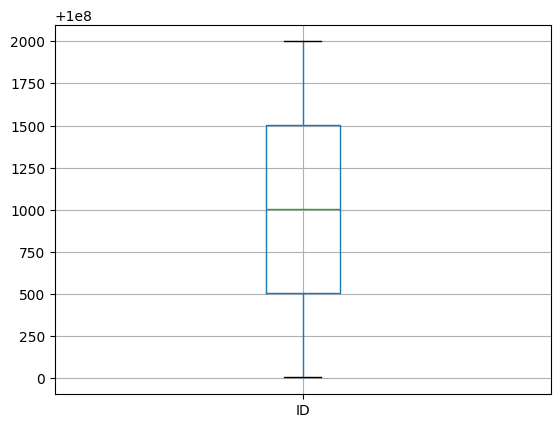

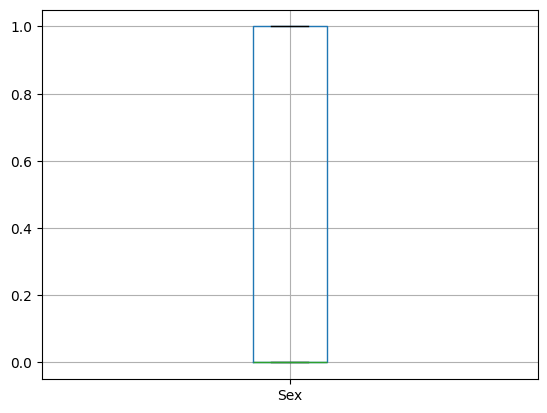

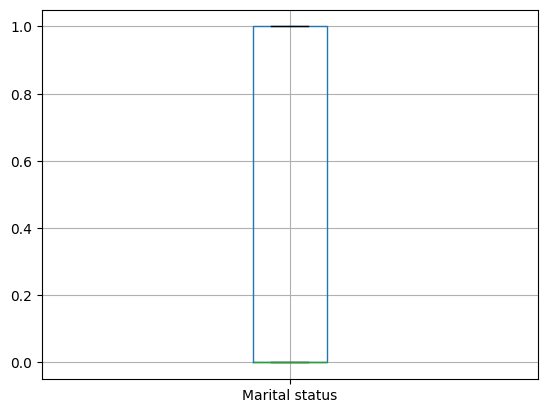

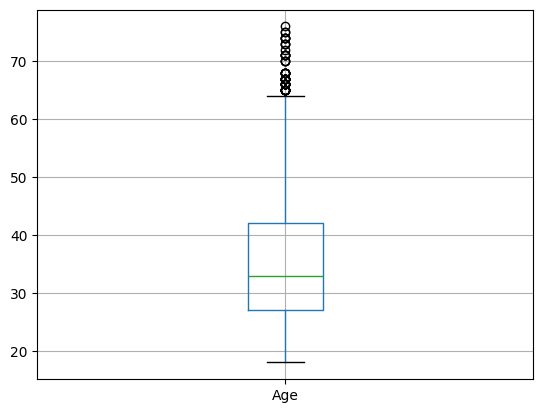

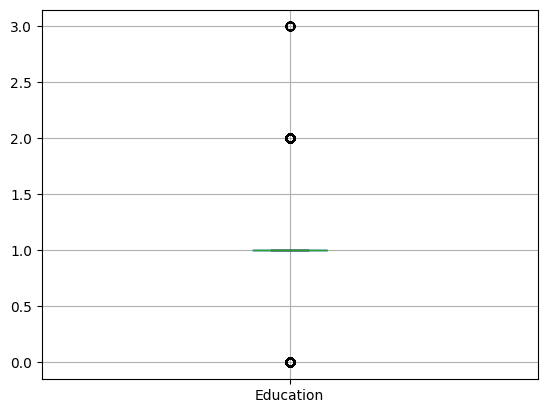

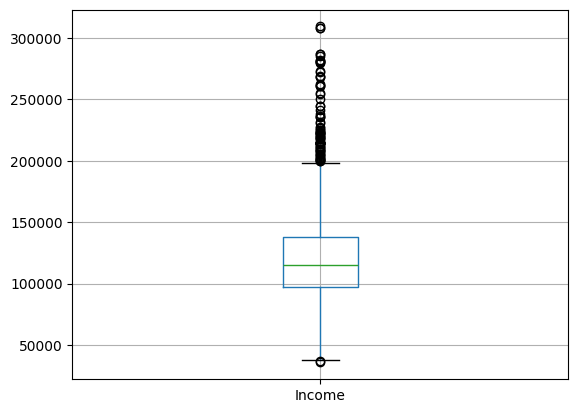

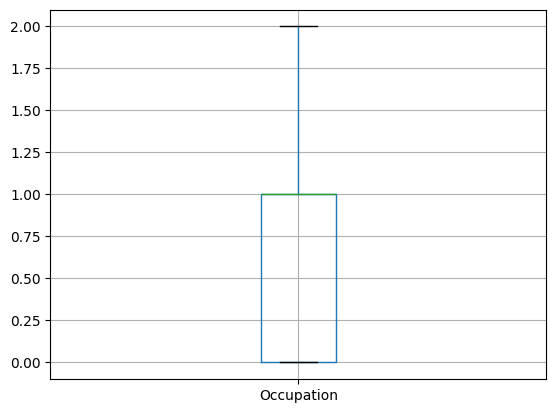

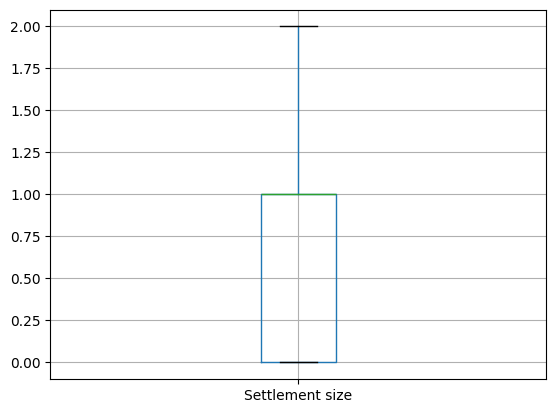

In [229]:
for i in df.columns:
    if(df[i].dtype in ["int64","float64"]):
        df.boxplot(i)
        plt.show()   

## Data Cleaning

In [230]:
Q1=df["Age"].quantile(0.25)
Q3=df["Age"].quantile(0.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is{max}")
print(f"min is{min}")
outlayerrpm=df[(df["Age"]>max) | (df["Age"]<min)]
df=df[(df["Age"]<=max) & (df["Age"]>=min)]
print(f"shape of outlayerrpm :{outlayerrpm.shape}")
print(f"shape of df :{df.shape}")

max is64.5
min is4.5
shape of outlayerrpm :(57, 8)
shape of df :(1943, 8)


In [231]:
Q1=df["Income"].quantile(0.25)
Q3=df["Income"].quantile(0.75)
iqr=Q3-Q1
max=Q3+(iqr*1.5)
min=Q1-(iqr*1.5)
print(f"max is{max}")
print(f"min is{min}")
outlayerrpm=df[(df["Income"]>max) | (df["Income"]<min)]
df=df[(df["Income"]<=max) & (df["Income"]>=min)]
print(f"shape of outlayerrpm :{outlayerrpm.shape}")
print(f"shape of df :{df.shape}")

max is196199.25
min is38149.25
shape of outlayerrpm :(75, 8)
shape of df :(1868, 8)


In [232]:
df

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0


In [233]:
df.corr()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
ID,1.000000,0.323808,0.059317,-0.069816,0.021899,-0.303544,-0.275733,-0.375275
Sex,0.323808,1.000000,0.554178,-0.192861,0.270523,-0.189723,-0.190592,-0.292876
Marital status,0.059317,0.554178,1.000000,-0.232011,0.406403,-0.054879,-0.014299,-0.086224
Age,-0.069816,-0.192861,-0.232011,1.000000,0.584090,0.311168,0.047220,0.096148
Education,0.021899,0.270523,0.406403,0.584090,1.000000,0.209153,0.020515,0.015662
Income,-0.303544,-0.189723,-0.054879,0.311168,0.209153,1.000000,0.659151,0.489777
Occupation,-0.275733,-0.190592,-0.014299,0.047220,0.020515,0.659151,1.000000,0.558019
Settlement size,-0.375275,-0.292876,-0.086224,0.096148,0.015662,0.489777,0.558019,1.000000


## Data visualizations

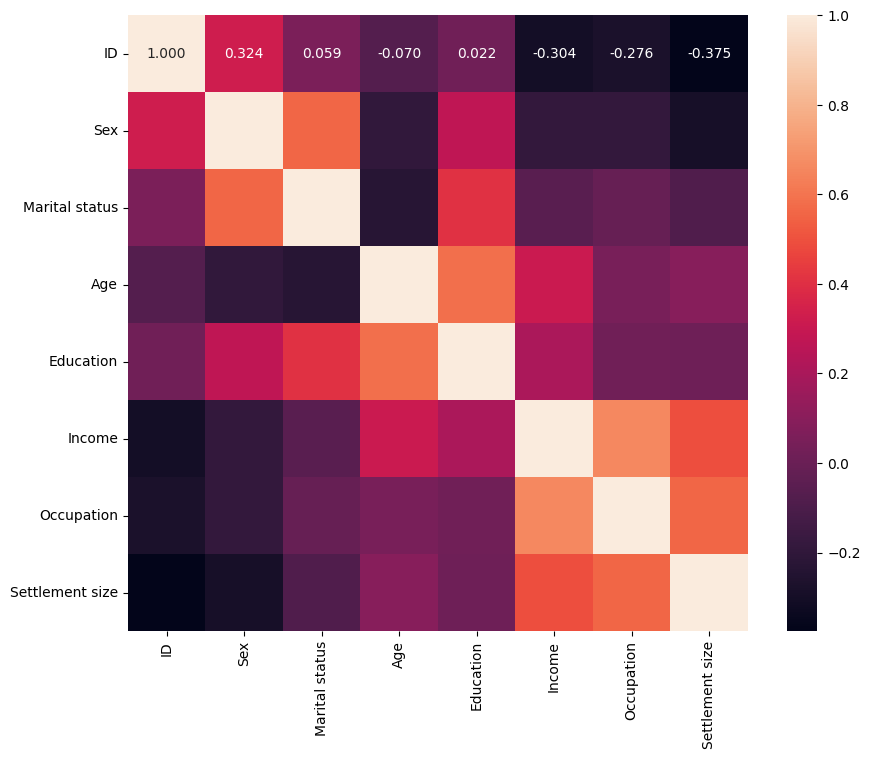

In [234]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot=True,fmt=".3f")
plt.show()

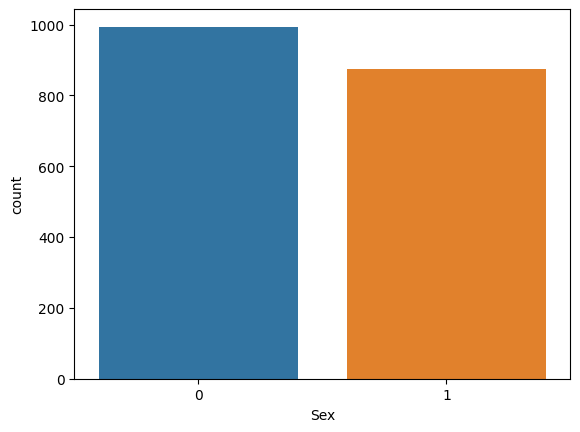

In [235]:
sns.countplot(x=df["Sex"],data=df)
plt.show()

C:\Users\Sigma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


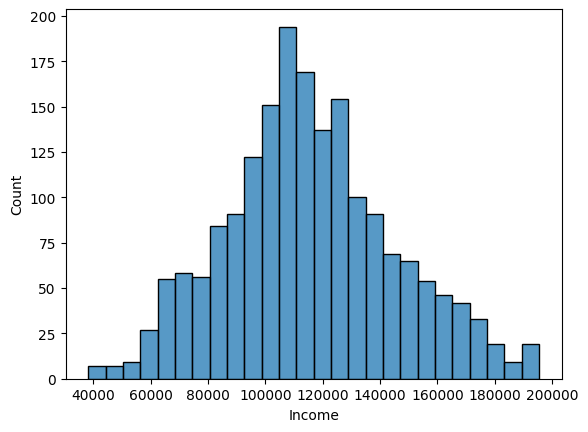

In [236]:
sns.histplot(x=df["Income"])
plt.show()

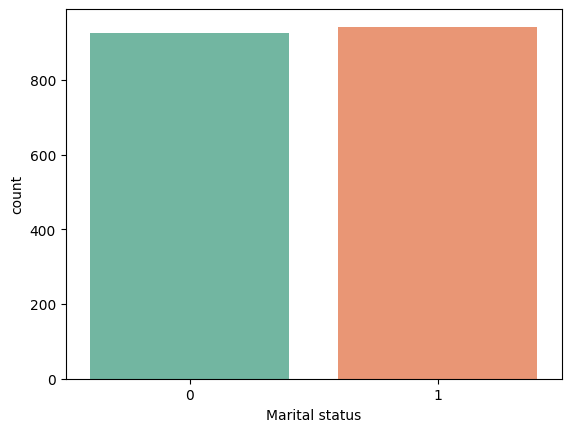

In [237]:


sns.countplot(x=df["Marital status"], data=df, palette="Set2")  
plt.show()


C:\Users\Sigma\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


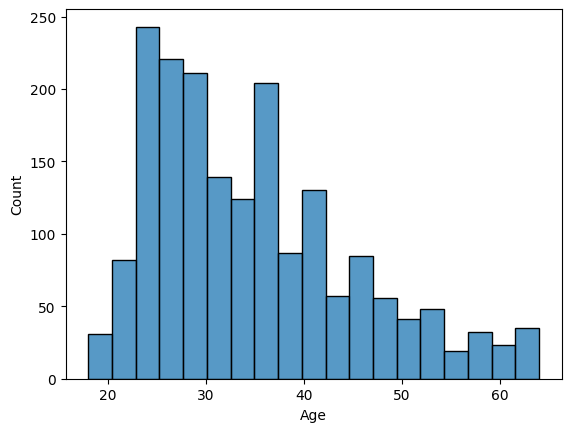

In [238]:
sns.histplot(df["Age"])
plt.show()

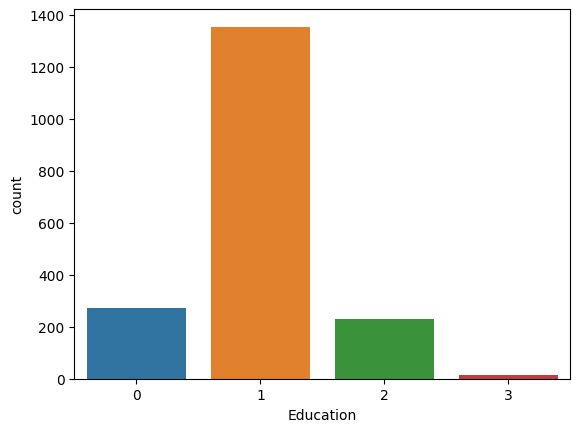

In [239]:
sns.countplot(x=df["Education"])
plt.show()

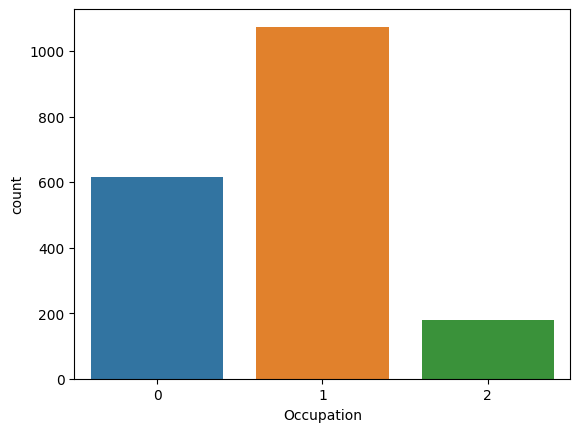

In [240]:
sns.countplot(x=df["Occupation"])
plt.show()

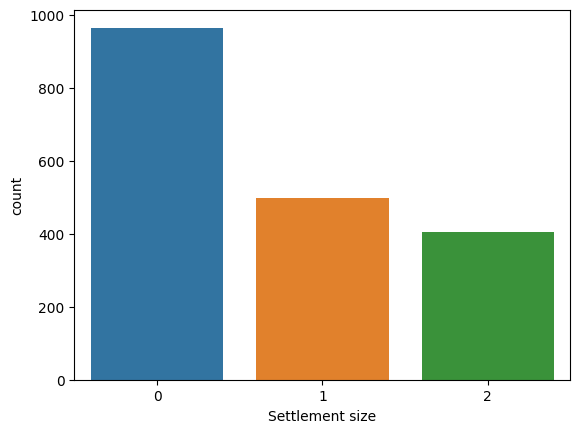

In [241]:
sns.countplot(x=df["Settlement size"])
plt.show()

## Date Preprocessing

In [242]:
for i in df.columns:
    print(i,"contain ",df[i].value_counts())
    print("----------------------------------------------------------------")

ID contain  ID
100002000    1
100000002    1
100000003    1
100000004    1
100000005    1
            ..
100000017    1
100000018    1
100000020    1
100000021    1
100000022    1
Name: count, Length: 1868, dtype: int64
----------------------------------------------------------------
Sex contain  Sex
0    994
1    874
Name: count, dtype: int64
----------------------------------------------------------------
Marital status contain  Marital status
1    942
0    926
Name: count, dtype: int64
----------------------------------------------------------------
Age contain  Age
26    115
27    106
25     86
24     82
28     79
35     79
23     75
31     74
36     71
30     66
33     66
29     66
32     65
34     58
40     56
37     54
22     49
38     48
42     42
39     39
46     34
21     33
41     32
43     30
49     29
48     27
44     27
45     26
47     25
20     23
50     22
51     19
52     18
57     17
54     16
53     14
64     14
63     13
61     12
60     11
58     10
56     10
55  

In [243]:
df.drop("ID",inplace=True,axis=1)

In [244]:
df.head()

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1,1,1,22,1,150773,1,2
2,0,0,49,1,89210,0,0
3,0,0,45,1,171565,1,1
4,0,0,53,1,149031,1,1
5,0,0,35,1,144848,0,0


## K-mean

In [245]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

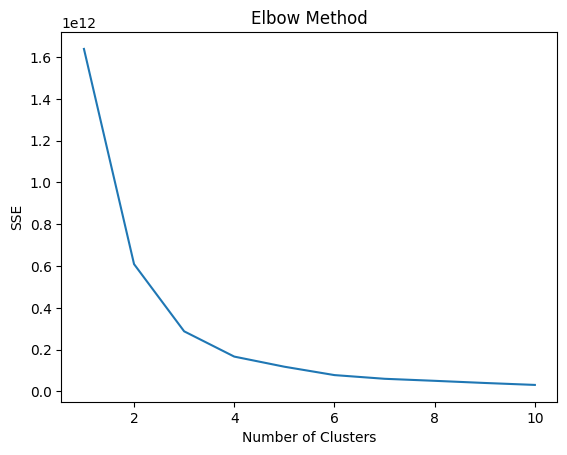

In [246]:
from sklearn.cluster import KMeans
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    sse.append(kmeans.inertia_)


plt.plot(range(1, 11), sse)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Method')
plt.show()

In [247]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [248]:
print(kmeans.cluster_centers_)

[[5.53149606e-01 5.23622047e-01 3.16417323e+01 8.74015748e-01
  8.05419114e+04 2.00787402e-01 1.83070866e-01]
 [3.03614458e-01 4.43373494e-01 3.93783133e+01 1.12771084e+00
  1.57465212e+05 1.28915663e+00 1.24096386e+00]
 [4.94179894e-01 5.20634921e-01 3.43767196e+01 9.96825397e-01
  1.16104154e+05 8.39153439e-01 7.40740741e-01]]


In [ ]:
df

In [249]:
print(df['Cluster'].value_counts())

Cluster
2    944
0    508
1    416
Name: count, dtype: int64


In [250]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(df.drop(columns=['Cluster']), df['Cluster'])
print(f"Silhouette Score: {sil_score:.2f}")


Silhouette Score: 0.55


In [251]:
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(df)
labels = kmeans.labels_


In [252]:
labels

array([0, 1, 0, ..., 1, 1, 1], shape=(1868,), dtype=int32)

In [253]:
df

,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Cluster
1,1,1,22,1,150773,1,2,1
2,0,0,49,1,89210,0,0,0
3,0,0,45,1,171565,1,1,1
4,0,0,53,1,149031,1,1,1
5,0,0,35,1,144848,0,0,1
...,...,...,...,...,...,...,...,...
1995,1,0,47,1,123525,0,0,2
1996,1,1,27,1,117744,1,0,2
1997,0,0,31,0,86400,0,0,0
1998,1,1,24,1,97968,0,0,0


## K-Means model with 4 clusters

In [254]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [255]:
print(kmeans.cluster_centers_)

[[5.52173913e-01 5.66666667e-01 3.19275362e+01 9.36231884e-01
  1.04919701e+05 7.39130435e-01 6.04347826e-01 1.53333333e+00]
 [2.85714286e-01 4.63414634e-01 4.00731707e+01 1.16027875e+00
  1.64512181e+05 1.35888502e+00 1.30313589e+00 1.00000000e+00]
 [4.04411765e-01 4.55882353e-01 3.73566176e+01 1.06801471e+00
  1.29871710e+05 9.65073529e-01 9.33823529e-01 1.76286765e+00]
 [5.50432277e-01 4.89913545e-01 3.18414986e+01 8.47262248e-01
  7.41267435e+04 1.44092219e-02 2.59365994e-02 6.66133815e-16]]


In [256]:
print(df['Cluster'].value_counts())

Cluster
0    691
2    543
3    347
1    287
Name: count, dtype: int64


In [257]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.546920473444143


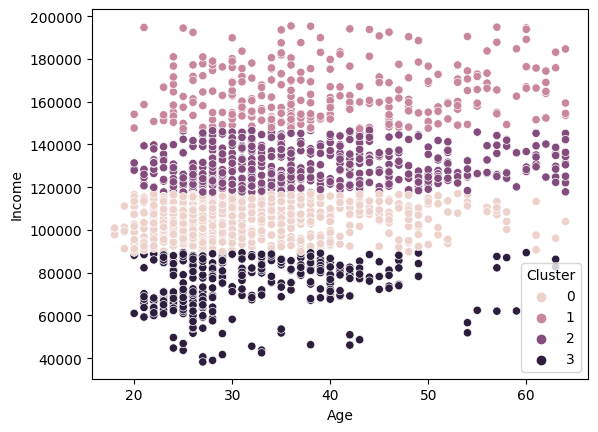

In [258]:
sns.scatterplot(x="Age",y="Income",hue="Cluster",data=df)
plt.show()

## K-Means model with 5 clusters

In [260]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(df)

In [261]:
print(df['Cluster'].value_counts())

Cluster
0    590
2    436
4    384
1    246
3    212
Name: count, dtype: int64


In [262]:
from sklearn.metrics import silhouette_score
silhouette_avg = silhouette_score(df, kmeans.labels_)
print("The average silhouette score is :", silhouette_avg)


The average silhouette score is : 0.5221712224781422


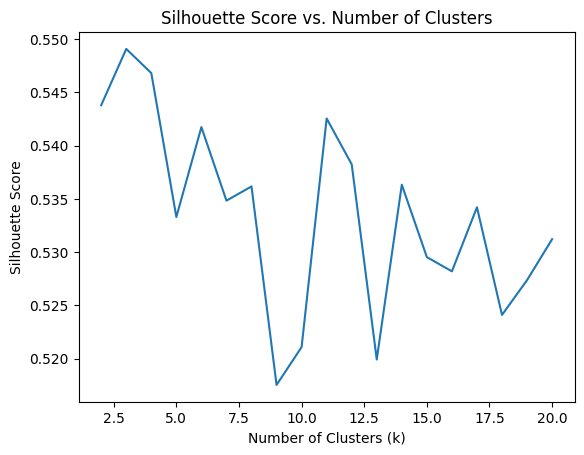

In [263]:


import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

silhouette_scores = []
for i in range(2, 21):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(df)
    labels = kmeans.labels_
    silhouette_avg = silhouette_score(df, labels)
    silhouette_scores.append(silhouette_avg)

plt.plot(range(2, 21), silhouette_scores)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score vs. Number of Clusters")
plt.show()


In [264]:
df.drop("Cluster",inplace=True,axis=1)

##  Hyperparameter Tuning k-mean clustering

In [265]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
import numpy as np

param_grid = {
    'n_clusters': np.arange(2, 8),  
    'init': ['k-means++', 'random'],  
    'max_iter': [300, 500],  
    'n_init': [10, 20],  
}

kmeans = KMeans()

X = df

grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=3, verbose=1)
grid_search.fit(X)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best Score: {grid_search.best_score_}')


Fitting 3 folds for each of 48 candidates, totalling 144 fits
Best Parameters: {'init': 'k-means++', 'max_iter': 500, 'n_clusters': np.int64(7), 'n_init': 20}
Best Score: -23151637562.114613


In [266]:
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score
import numpy as np

param_grid = {
    'n_clusters': np.arange(2, 8),  
    'init': ['k-means++', 'random'],  
    'max_iter': [300, 500],  
    'n_init': [10, 20],  
}

kmeans = KMeans()


X = df

grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, verbose=1)
grid_search.fit(X)
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

best_kmeans = KMeans(**best_params)
best_kmeans.fit(X)

silhouette = silhouette_score(X, best_kmeans.labels_)
print(f'Silhouette Score: {silhouette}')


Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'init': 'k-means++', 'max_iter': 300, 'n_clusters': np.int64(7), 'n_init': 10}
Silhouette Score: 0.5350132784409467


## Hierarchy

In [268]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

n_clusters_values = [2, 3, 4, 5, 6,7,] 

best_n_clusters = None
best_score = -1

for n_clusters in n_clusters_values:
    clustering = AgglomerativeClustering(n_clusters=n_clusters)
    labels = clustering.fit_predict(df)
    
    if len(set(labels)) > 1: 
        score = silhouette_score(df, labels)
        print(f"n_clusters: {n_clusters}, silhouette score: {score}")
        if score > best_score:
            best_score = score
            best_n_clusters = n_clusters

print("\n Best Parameters:")
print(f"Best number of clusters (n_clusters): {best_n_clusters}")
print(f"Best silhouette score: {best_score}")



n_clusters: 2, silhouette score: 0.5528547506547176
n_clusters: 3, silhouette score: 0.5353326340249358
n_clusters: 4, silhouette score: 0.525109475197138
n_clusters: 5, silhouette score: 0.5101134613459343
n_clusters: 6, silhouette score: 0.5008047810109213
n_clusters: 7, silhouette score: 0.4946650508472525

 Best Parameters:
Best number of clusters (n_clusters): 2
Best silhouette score: 0.5528547506547176


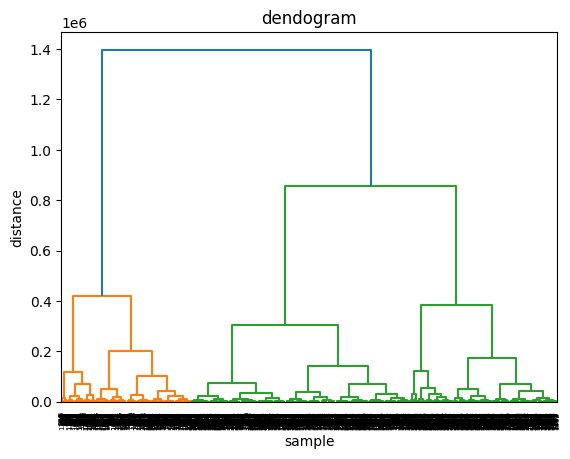

In [269]:
import scipy.cluster.hierarchy as sch
data=sch.linkage(df,method="ward")
dendogram=sch.dendrogram(data)
plt.title("dendogram")
plt.xlabel("sample")
plt.ylabel("distance")
plt.show()

## DBSCAN

In [275]:
import numpy as np
import pandas as pd
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [277]:
scaler = StandardScaler()
df = scaler.fit_transform(df)

In [283]:
eps_values = [0.1, 0.5, 1, 1.5, 2]
min_samples_values = [3, 5, 10]

best_eps = None
best_min_samples = None
best_score = -1

for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        labels = dbscan.fit_predict(df)
        
        if len(set(labels)) > 1: 
            score = silhouette_score(df, labels)
            print(f"eps: {eps}, min_samples: {min_samples}, silhouette score: {score}")
            if score > best_score:
                best_score = score
                best_eps = eps
                best_min_samples = min_samples


print("\n best hyperparameter")
print(f"أفضل eps: {best_eps}")
print(f"أفضل min_samples: {best_min_samples}")
print(f"أفضل silhouette score: {best_score}")


eps: 0.1, min_samples: 3, silhouette score: -0.34338567792853936
eps: 0.1, min_samples: 5, silhouette score: -0.39912611059896613
eps: 0.5, min_samples: 3, silhouette score: 0.368426671676059
eps: 0.5, min_samples: 5, silhouette score: 0.30618412065804623
eps: 0.5, min_samples: 10, silhouette score: 0.2278106633282411
eps: 1, min_samples: 3, silhouette score: 0.41463789776376525
eps: 1, min_samples: 5, silhouette score: 0.38900773029898034
eps: 1, min_samples: 10, silhouette score: 0.3333273082772509
eps: 1.5, min_samples: 3, silhouette score: 0.3572919828246895
eps: 1.5, min_samples: 5, silhouette score: 0.3542896271065297
eps: 1.5, min_samples: 10, silhouette score: 0.3425501797561561
eps: 2, min_samples: 3, silhouette score: 0.17232433255286383
eps: 2, min_samples: 5, silhouette score: 0.17719499269258665
eps: 2, min_samples: 10, silhouette score: 0.17968652635331064

 best hyperparameter
أفضل eps: 1
أفضل min_samples: 3
أفضل silhouette score: 0.41463789776376525
